<a href="https://colab.research.google.com/github/aauspicious/CodSoft-DataScience/blob/main/Movie_rating_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-7e6ab1687dd8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = X['Genre'].fillna('')  # Replace NaN with empty string for 'Genre'
<ipython-input-2-7e6ab1687dd8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Director'] = X['Director'].fillna('')  # Replace NaN with empty string for 'Director'
<ipython-input-2-7e6ab1687dd8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Root Mean Squared Error: 1.8425396418546933


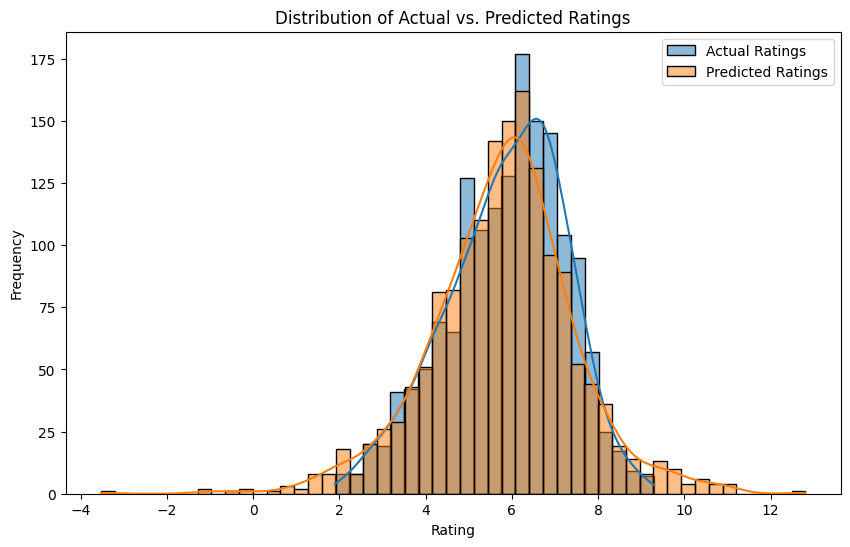

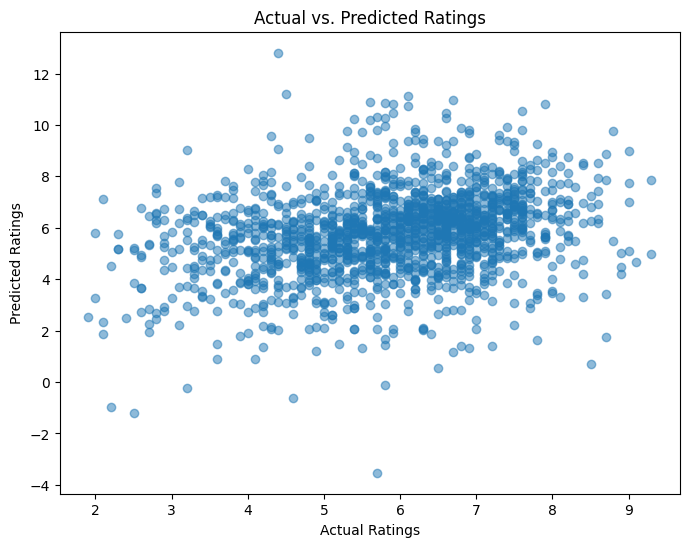

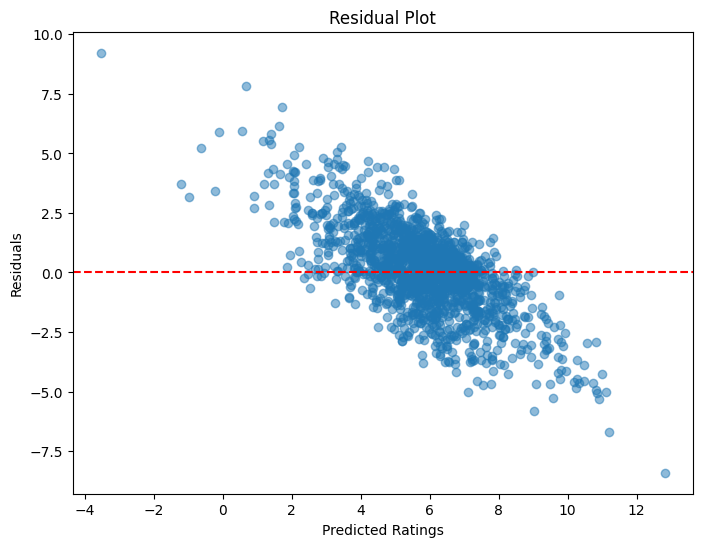

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns


data_path = '/content/IMDb_Movies_India.csv'


try:
    data = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv(data_path, encoding='latin-1')
    except UnicodeDecodeError:
        data = pd.read_csv(data_path, encoding='iso-8859-1')

# Selection of relevant features
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

# Handle missing values (NaN) in text columns before vectorization
X['Genre'] = X['Genre'].fillna('')
X['Director'] = X['Director'].fillna('')
X['Actor 1'] = X['Actor 1'].fillna('')
X['Actor 2'] = X['Actor 2'].fillna('')
X['Actor 3'] = X['Actor 3'].fillna('')

# Preprocess text features (Genre, Actors) using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_genre = vectorizer.fit_transform(X['Genre'])
X_director = vectorizer.fit_transform(X['Director'])
X_actor1 = vectorizer.fit_transform(X['Actor 1'])
X_actor2 = vectorizer.fit_transform(X['Actor 2'])
X_actor3 = vectorizer.fit_transform(X['Actor 3'])


X_features = hstack([X_genre, X_director, X_actor1, X_actor2, X_actor3])

# Handle missing values in the target variable ('Rating')
y = data['Rating'].dropna()


X_features = X_features[y.index]
# Split data into training and testing sets (after handling missing values)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression Model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate model performance (using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Root Mean Squared Error
print("Root Mean Squared Error:", rmse)

# Visualizations

# 1. Distribution of Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Ratings', kde=True)
sns.histplot(y_pred, label='Predicted Ratings', kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Ratings')
plt.legend()
plt.show()

# 2. Scatter plot of Actual vs. Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.show()